# OpenMP Parallel Code for Sum of N - Double Precision Floating Point Numbers

## Problem Statement

Write OpenMP parallel code for summing **N** double precision floating point numbers. The input size should be large, at least 1 million numbers. You can generate and store larger double precision values in a file and then read from it to perform the summation.

The problem consists of the following tasks:

1. **Parallel Code Using Reduction Construct**  
   Implement OpenMP code using the reduction construct for parallel summation.

2. **Parallel Code Using Critical Section**  
   Implement OpenMP code using the critical section to perform parallel summation.

3. **Report - Thread vs Time**  
   Run the parallel code with different numbers of threads: 1, 2, 4, 8, 16, 32, and 64 processors. Measure the time taken for each run and report the results.

4. **Plot Speedup vs Processor**  
   Plot the speedup of the parallel code against the number of processors (threads).

5. **Estimate Parallelization Fraction and Inferenc**  
   Estimate the parallelization fraction and provide an inference regarding the performance.

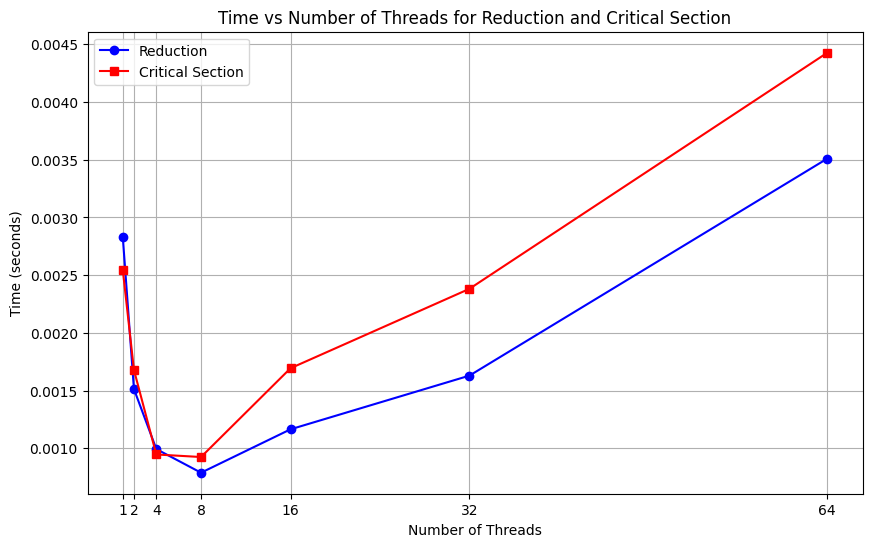

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Updated Times (in seconds) for reduction approach
time_reduction = [0.002835, 0.001514, 0.000994, 0.000789, 0.001165, 0.001630, 0.003510]

# Updated Times (in seconds) for critical section approach
time_critical = [0.002548, 0.001680, 0.000947, 0.000925, 0.001694, 0.002382, 0.004427]

# Plotting the times for Reduction and Critical Section
plt.figure(figsize=(10, 6))

# Plot for reduction
plt.plot(threads, time_reduction, label='Reduction', marker='o', linestyle='-', color='blue')

# Plot for critical section
plt.plot(threads, time_critical, label='Critical Section', marker='s', linestyle='-', color='red')

# Adding labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Threads for Reduction and Critical Section')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(threads)
plt.show()

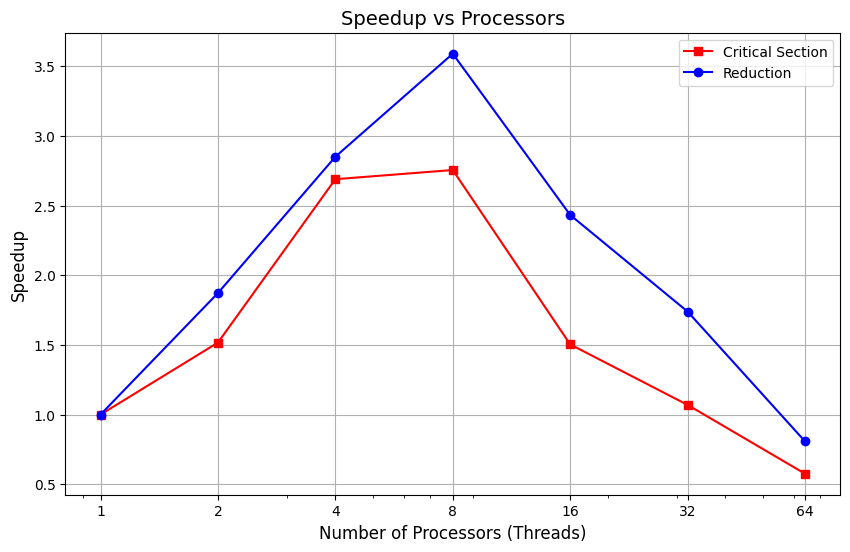

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Data for Critical Section version speedup
speedup_critical = [1.000000, 1.516887, 2.689885, 2.755814, 1.503913, 1.069573, 0.575580]

# Data for Reduction version speedup
speedup_reduction = [1.000000, 1.872457, 2.851106, 3.590671, 2.433018, 1.739345, 0.807626]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot Speedup vs Processors for Critical Section version
plt.plot(threads, speedup_critical, label='Critical Section', marker='s', linestyle='-', color='red')

# Plot Speedup vs Processors for Reduction version
plt.plot(threads, speedup_reduction, label='Reduction', marker='o', linestyle='-', color='blue')

# Set plot labels and title
plt.xlabel('Number of Processors (Threads)', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.title('Speedup vs Processors', fontsize=14)

# Set grid for better readability
plt.grid(True)

# Set the x-axis to be on a logarithmic scale for better visualization
plt.xscale('log')

# Manually set the x-ticks to the exact values of 1, 2, 4, 8, 16, 32, 64
plt.xticks(threads, labels=[str(x) for x in threads])

# Show the legend
plt.legend()

# Display the plot
plt.show()

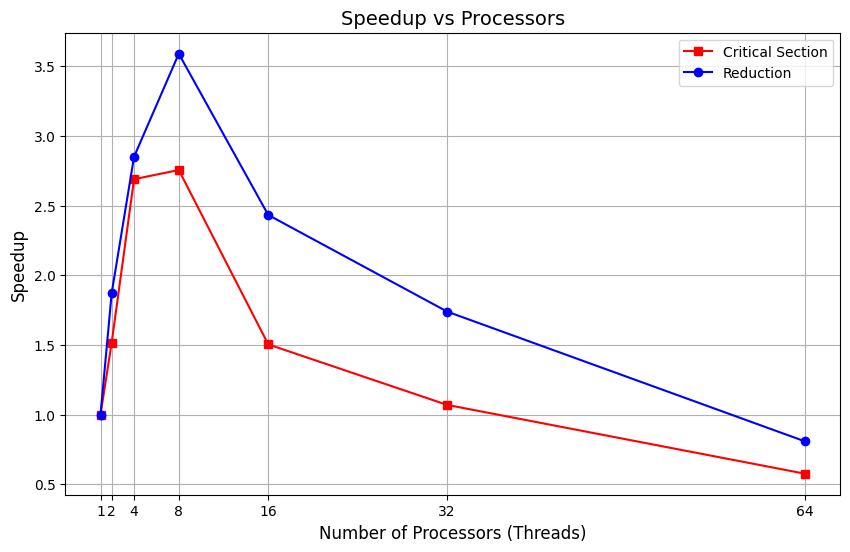

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Data for Critical Section version speedup
speedup_critical = [1.000000, 1.516887, 2.689885, 2.755814, 1.503913, 1.069573, 0.575580]

# Data for Reduction version speedup
speedup_reduction = [1.000000, 1.872457, 2.851106, 3.590671, 2.433018, 1.739345, 0.807626]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot Speedup vs Processors for Critical Section version
plt.plot(threads, speedup_critical, label='Critical Section', marker='s', linestyle='-', color='red')

# Plot Speedup vs Processors for Reduction version
plt.plot(threads, speedup_reduction, label='Reduction', marker='o', linestyle='-', color='blue')

# Set plot labels and title
plt.xlabel('Number of Processors (Threads)', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.title('Speedup vs Processors', fontsize=14)

# Set grid for better readability
plt.grid(True)

# Manually set the x-ticks to the exact values of 1, 2, 4, 8, 16, 32, 64
plt.xticks(threads, labels=[str(x) for x in threads])

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
def calculate_parallel_fraction(S, N):
    """
    Calculate the fraction P that can be parallelized using Amdahl's Law.

    :param S: Speedup (S)
    :param N: Number of processors/threads (N)
    :return: Parallel fraction P or None if the values are invalid.
    """
    if S <= 1 or N <= 1:
        # Skip calculation for invalid values of S or N
        return None

    P = ((S - 1) * N) / (S * (N - 1))
    return P

# Updated Speedup values for Critical Test (from your latest data)
speedups_critical = {
    2: 1.516887,
    4: 2.689885,
    8: 2.755814,
    16: 1.503913,
    32: 1.069573,
    64: 0.575580
}

# Updated Speedup values for Reduction Test (from your latest data)
speedups_reduction = {
    2: 1.872457,
    4: 2.851106,
    8: 3.590671,
    16: 2.433018,
    32: 1.739345,
    64: 0.807626
}

# Calculate parallel fraction P for both critical and reduction test cases
parallel_fraction_critical = {threads: calculate_parallel_fraction(speedup, threads) for threads, speedup in speedups_critical.items() if calculate_parallel_fraction(speedup, threads) is not None}
parallel_fraction_reduction = {threads: calculate_parallel_fraction(speedup, threads) for threads, speedup in speedups_reduction.items() if calculate_parallel_fraction(speedup, threads) is not None}

# Display results for Critical Test
print("Parallel Fraction (P) for Critical Test:")
for threads, P in parallel_fraction_critical.items():
    print(f"Threads: {threads}, Parallel Fraction P: {P:.6f}")

# Display results for Reduction Test
print("\nParallel Fraction (P) for Reduction Test:")
for threads, P in parallel_fraction_reduction.items():
    print(f"Threads: {threads}, Parallel Fraction P: {P:.6f}")

Parallel Fraction (P) for Critical Test:
Threads: 2, Parallel Fraction P: 0.681510
Threads: 4, Parallel Fraction P: 0.837649
Threads: 8, Parallel Fraction P: 0.728149
Threads: 16, Parallel Fraction P: 0.357406
Threads: 32, Parallel Fraction P: 0.067146

Parallel Fraction (P) for Reduction Test:
Threads: 2, Parallel Fraction P: 0.931885
Threads: 4, Parallel Fraction P: 0.865679
Threads: 8, Parallel Fraction P: 0.824572
Threads: 16, Parallel Fraction P: 0.628254
Threads: 32, Parallel Fraction P: 0.438783


---

# OpenMP Parallel Code for Two Vectors of Double Precision Floating Point Numbers - Addition and Multiplication

## Problem Statement

Write OpenMP parallel code for performing vector addition and vector multiplication on two vectors of **N** double precision floating point numbers. The input size should be large, at least 1 million elements. You can generate and store larger double precision values in a file and then read from it to perform the operations.

The problem consists of the following tasks:

1. **Parallel Code for Vector Addition**  
   Implement OpenMP code to perform the vector addition of two double precision vectors.

2. **Parallel Code for Vector Multiplication**  
   Implement OpenMP code to perform the vector multiplication of two double precision vectors.

3. **Report - Thread vs Time**  
   Run the parallel code with different numbers of threads: 1, 2, 4, 8, 16, 32, and 64 processors. Measure the time taken for each run and report the results.

4. **Plot Speedup vs Processor**  
   Plot the speedup of the parallel code against the number of processors (threads).

5. **Estimate Parallelization Fraction and Inference**  
   Estimate the parallelization fraction and provide an inference regarding the performance.


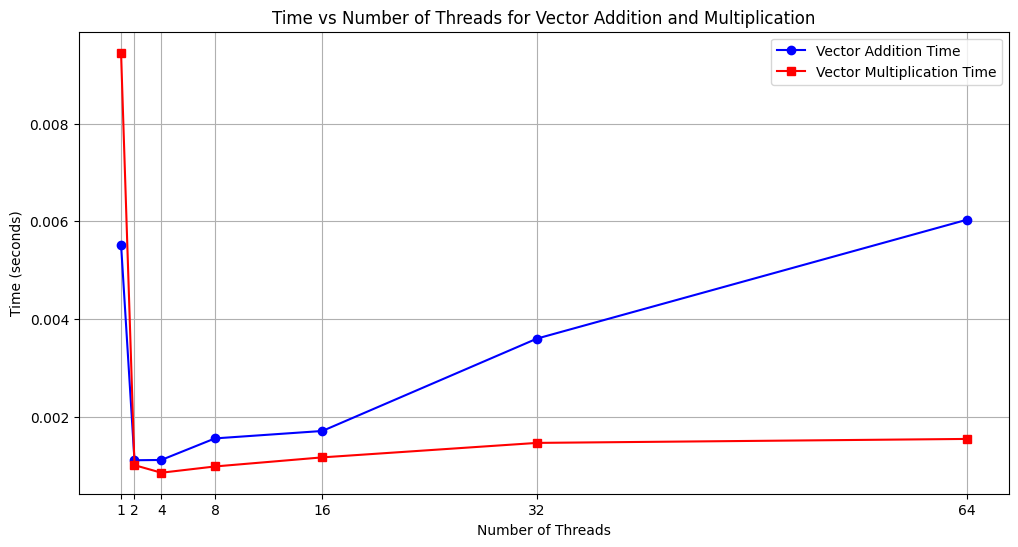

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Updated times for vector addition (in seconds) from your output
time_addition = [0.005526, 0.001114, 0.001120, 0.001561, 0.001713, 0.003603, 0.006031]

# Updated times for vector multiplication (in seconds) from your output
time_multiplication = [0.009449, 0.001014, 0.000859, 0.000987, 0.001173, 0.001469, 0.001550]

# Plotting the times for Vector Addition and Vector Multiplication
plt.figure(figsize=(12, 6))

# Plot for vector addition times
plt.plot(threads, time_addition, label='Vector Addition Time', marker='o', linestyle='-', color='blue')

# Plot for vector multiplication times
plt.plot(threads, time_multiplication, label='Vector Multiplication Time', marker='s', linestyle='-', color='red')

# Adding labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Threads for Vector Addition and Multiplication')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(threads)
plt.show()

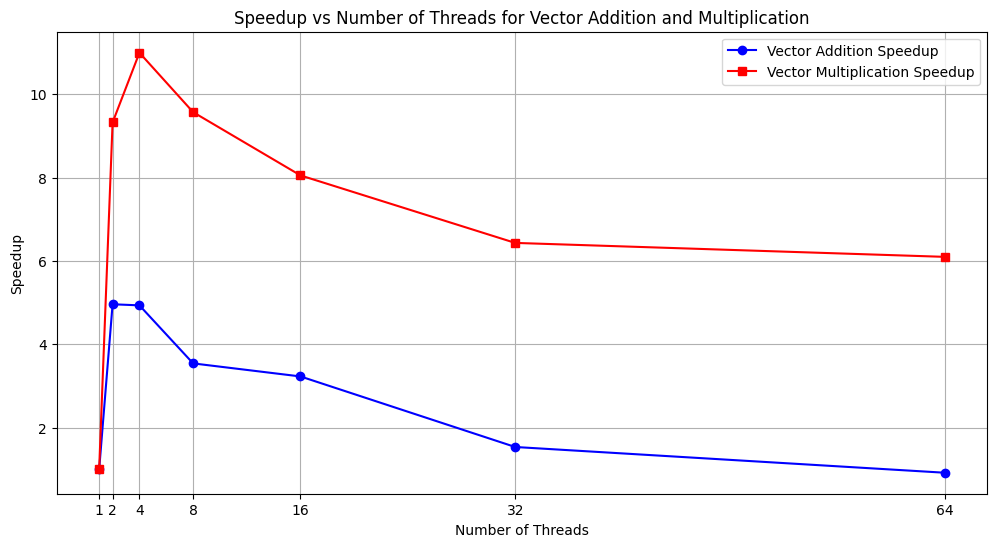

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Updated speedup for vector addition based on time for 1 thread
speedup_addition = [1.0, 4.959372, 4.933208, 3.540293, 3.226974, 1.533921, 0.916273]

# Updated speedup for vector multiplication based on time for 1 thread
speedup_multiplication = [1.0, 9.322806, 10.996684, 9.570262, 8.052303, 6.432072, 6.097427]

# Plotting Speedup vs Threads
plt.figure(figsize=(12, 6))

# Plot for vector addition speedup
plt.plot(threads, speedup_addition, label='Vector Addition Speedup', marker='o', linestyle='-', color='blue')

# Plot for vector multiplication speedup
plt.plot(threads, speedup_multiplication, label='Vector Multiplication Speedup', marker='s', linestyle='-', color='red')

# Adding labels and title for speedup plot
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads for Vector Addition and Multiplication')
plt.legend()

# Display the plot for speedup
plt.grid(True)
plt.xticks(threads)
plt.show()

In [ ]:
def calculate_parallel_fraction(S, N):
    """
    Calculate the fraction P that can be parallelized using Amdahl's Law.

    :param S: Speedup (S)
    :param N: Number of processors/threads (N)
    :return: Parallel fraction P or None if the values are invalid.
    """
    if S <= 1 or N <= 1:
        # Skip calculation for invalid values of S or N
        return None

    P = ((S - 1) * N) / (S * (N - 1))
    return P

# Updated Speedup values (from your latest data)
speedups_addition = {
    2: 4.959372,
    4: 4.933208,
    8: 3.540293,
    16: 3.226974,
    32: 1.533921,
    64: 0.916273  # This value is less than 1, will be handled properly now
}

speedups_multiplication = {
    2: 9.322806,
    4: 10.996684,
    8: 9.570262,
    16: 8.052303,
    32: 6.432072,
    64: 6.097427
}

# Calculate parallel fraction P for vector addition and multiplication
parallel_fraction_addition = {threads: calculate_parallel_fraction(speedup, threads) for threads, speedup in speedups_addition.items() if calculate_parallel_fraction(speedup, threads) is not None}
parallel_fraction_multiplication = {threads: calculate_parallel_fraction(speedup, threads) for threads, speedup in speedups_multiplication.items() if calculate_parallel_fraction(speedup, threads) is not None}

# Display results
print("Parallel Fraction (P) for Vector Addition:")
for threads, P in parallel_fraction_addition.items():
    print(f"Threads: {threads}, Parallel Fraction P: {P:.6f}")

print("\nParallel Fraction (P) for Vector Multiplication:")
for threads, P in parallel_fraction_multiplication.items():
    print(f"Threads: {threads}, Parallel Fraction P: {P:.6f}")

Parallel Fraction (P) for Vector Addition:
Threads: 2, Parallel Fraction P: 1.596723
Threads: 4, Parallel Fraction P: 1.063056
Threads: 8, Parallel Fraction P: 0.820043
Threads: 16, Parallel Fraction P: 0.736120
Threads: 32, Parallel Fraction P: 0.359304

Parallel Fraction (P) for Vector Multiplication:
Threads: 2, Parallel Fraction P: 1.785472
Threads: 4, Parallel Fraction P: 1.212085
Threads: 8, Parallel Fraction P: 1.023440
Threads: 16, Parallel Fraction P: 0.934199
Threads: 32, Parallel Fraction P: 0.871772
Threads: 64, Parallel Fraction P: 0.849266


---

# OpenMP Parallel Code for Vector Addition and Multiplication of Two Vectors of Double Precision Floating Point Numbers

## Problem Statement

Write OpenMP parallel code for performing vector addition and vector multiplication on two vectors of **N** double precision floating point numbers. The input size should be large, at least 1 million elements. You can generate and store larger double precision values in a file and then read from it to perform the operations.

The problem consists of the following tasks:

1. **Parallel Code for Vector Addition**  
   Implement OpenMP code to perform the vector addition of two double precision vectors.

2. **Parallel Code for Vector Multiplication**  
   Implement OpenMP code to perform the vector multiplication of two double precision vectors.

3. **Report - Thread vs Time**  
   Run the parallel code with different numbers of threads: 1, 2, 4, 8, 16, 32, and 64 processors. Measure the time taken for each run and report the results.

4. **Plot Speedup vs Processor**  
   Plot the speedup of the parallel code against the number of processors (threads).

5. **Estimate Parallelization Fraction and Inference**  
   Estimate the parallelization fraction and provide an inference regarding the performance.

---

## OpenMP Code for Vector Addition and Multiplication

Below is the OpenMP code to perform vector addition and multiplication on two large vectors of double precision values.

```c
#include <stdio.h>
#include <stdlib.h>
#include <omp.h>
#include <time.h>

#define N 1000000 // Number of double precision values

// Function to perform dot product
double dot_product(double *a, double *b) {
    double result = 0.0;

    #pragma omp parallel for reduction(+:result)
    for (int i = 0; i < N; i++) {
        result += a[i] * b[i];
    }

    return result;
}

// Function to perform dot product using critical section
double dot_product_critical(double *a, double *b) {
    double result = 0.0;

    #pragma omp parallel for
    for (int i = 0; i < N; i++) {
        double temp = a[i] * b[i];

        #pragma omp critical
        {
            result += temp;
        }
    }

    return result;
}

int main() {
    // Dynamically allocate memory for vectors
    double *a = (double*)malloc(N * sizeof(double));
    double *b = (double*)malloc(N * sizeof(double));

    // Check if memory allocation is successful
    if (a == NULL || b == NULL) {
        printf("Memory allocation failed.\n");
        return -1;
    }

    double start_time, end_time;
    double time_with_1_thread_dot, time_with_1_thread_critical;

    // Initialize the arrays with random double precision values (for illustration, from 1 to N)
    for (int i = 0; i < N; i++) {
        a[i] = (double)(i + 1);  // Array 'a' values from 1 to N
        b[i] = (double)(N - i);  // Array 'b' values from N to 1
    }

    printf("Performing Dot Product Calculation\n\n");

    // Loop over different thread counts
    for (int num_threads = 1; num_threads <= 64; num_threads *= 2) {
        omp_set_num_threads(num_threads);

        // Dot product without critical section timing
        start_time = omp_get_wtime();
        double result_dot = dot_product(a, b);
        end_time = omp_get_wtime();

        if (num_threads == 1) {
            time_with_1_thread_dot = end_time - start_time;
        }

        double time_taken_dot = end_time - start_time;
        double speedup_dot = time_with_1_thread_dot / time_taken_dot;

        // Printing result for dot product without critical section
        printf("Dot Product (without critical section) - Threads: %d\n", num_threads);
        printf("Time: %f seconds\n", time_taken_dot);
        printf("Speedup: %f\n", speedup_dot);

        // Print the result for verification
        printf("Dot product result: %.15f\n\n", result_dot);

        // Dot product with critical section timing
        start_time = omp_get_wtime();
        double result_dot_critical = dot_product_critical(a, b);
        end_time = omp_get_wtime();

        if (num_threads == 1) {
            time_with_1_thread_critical = end_time - start_time;
        }

        double time_taken_critical = end_time - start_time;
        double speedup_critical = time_with_1_thread_critical / time_taken_critical;

        // Printing result for dot product with critical section
        printf("Dot Product (with critical section) - Threads: %d\n", num_threads);
        printf("Time: %f seconds\n", time_taken_critical);
        printf("Speedup: %f\n", speedup_critical);

        // Print the result for verification
        printf("Dot product result with critical section: %.15f\n\n", result_dot_critical);
    }

    // Free allocated memory
    free(a);
    free(b);

    return 0;
}


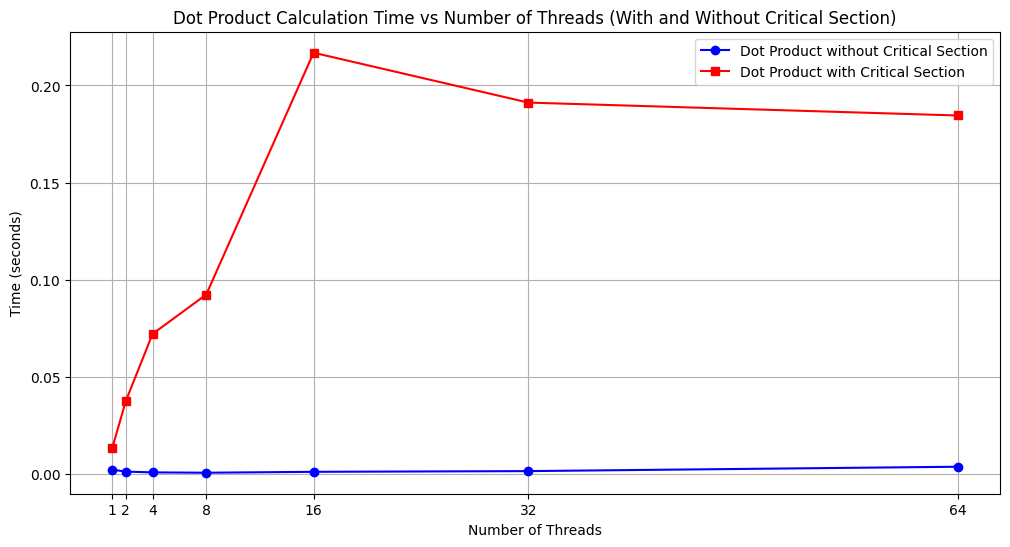

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Times for dot product without critical section (in seconds) from your output
time_dot_product_no_critical = [0.002336, 0.001324, 0.000931, 0.000755, 0.001222, 0.001585, 0.003836]

# Times for dot product with critical section (in seconds) from your output
time_dot_product_with_critical = [0.013477, 0.037516, 0.072151, 0.092412, 0.216826, 0.191173, 0.184531]

# Plotting the times for Dot Product calculations
plt.figure(figsize=(12, 6))

# Plot for dot product without critical section times
plt.plot(threads, time_dot_product_no_critical, label='Dot Product without Critical Section', marker='o', linestyle='-', color='blue')

# Plot for dot product with critical section times
plt.plot(threads, time_dot_product_with_critical, label='Dot Product with Critical Section', marker='s', linestyle='-', color='red')

# Adding labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.title('Dot Product Calculation Time vs Number of Threads (With and Without Critical Section)')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(threads)
plt.show()

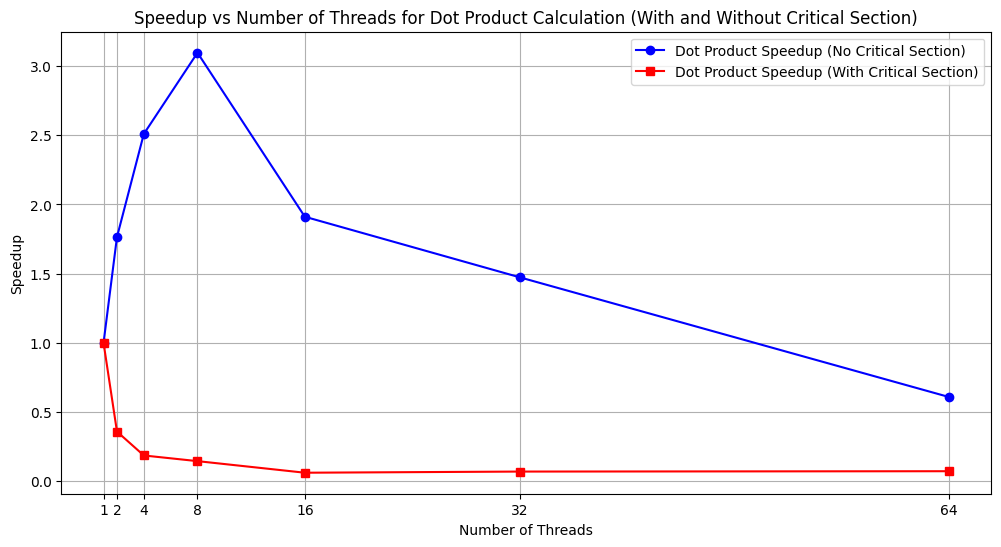

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Speedup for dot product without critical section, based on time for 1 thread
speedup_dot_product_no_critical = [1.0, 1.764039, 2.508500, 3.095322, 1.910780, 1.473736, 0.608858]

# Speedup for dot product with critical section, based on time for 1 thread
speedup_dot_product_with_critical = [1.0, 0.359231, 0.186787, 0.145835, 0.062155, 0.070496, 0.073033]

# Plotting Speedup vs Threads for Dot Product
plt.figure(figsize=(12, 6))

# Plot for dot product speedup without critical section
plt.plot(threads, speedup_dot_product_no_critical, label='Dot Product Speedup (No Critical Section)', marker='o', linestyle='-', color='blue')

# Plot for dot product speedup with critical section
plt.plot(threads, speedup_dot_product_with_critical, label='Dot Product Speedup (With Critical Section)', marker='s', linestyle='-', color='red')

# Adding labels and title for speedup plot
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads for Dot Product Calculation (With and Without Critical Section)')
plt.legend()

# Display the plot for speedup
plt.grid(True)
plt.xticks(threads)
plt.show()

Speedup for Dot Product (No Critical Section):
Threads: 1, Speedup: 1.0000
Threads: 2, Speedup: 1.7644
Threads: 4, Speedup: 2.5091
Threads: 8, Speedup: 3.0940
Threads: 16, Speedup: 1.9116
Threads: 32, Speedup: 1.4738
Threads: 64, Speedup: 0.6090

Speedup for Dot Product (With Critical Section):
Threads: 1, Speedup: 1.0000
Threads: 2, Speedup: 0.3592
Threads: 4, Speedup: 0.1868
Threads: 8, Speedup: 0.1458
Threads: 16, Speedup: 0.0622
Threads: 32, Speedup: 0.0705
Threads: 64, Speedup: 0.0730


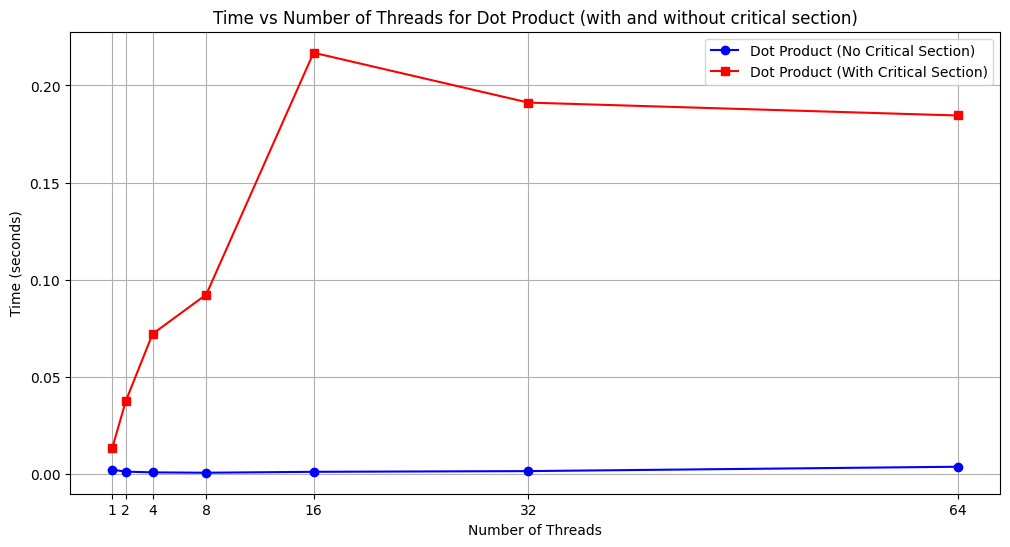

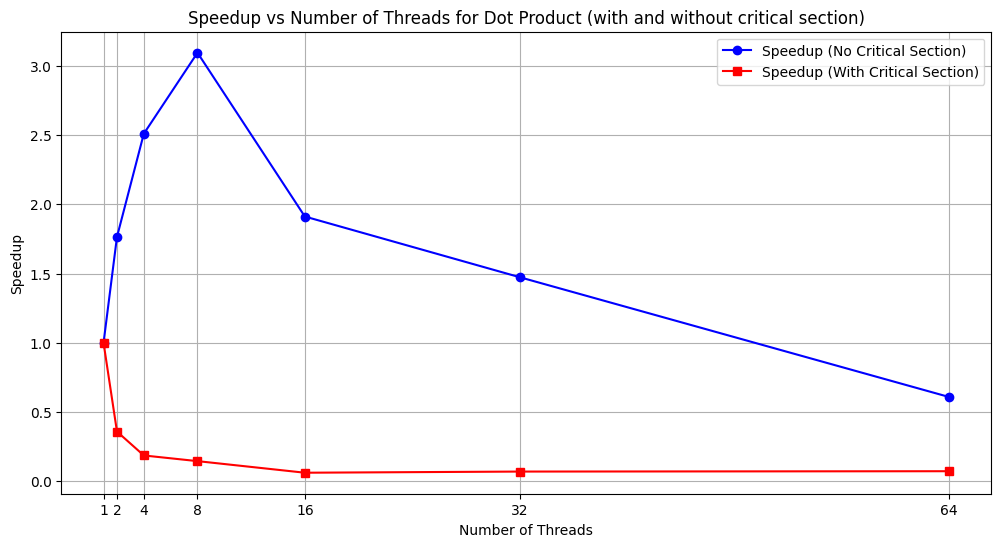

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Times for dot product without critical section (in seconds)
time_dot_no_critical = [0.002336, 0.001324, 0.000931, 0.000755, 0.001222, 0.001585, 0.003836]

# Times for dot product with critical section (in seconds)
time_dot_with_critical = [0.013477, 0.037516, 0.072151, 0.092412, 0.216826, 0.191173, 0.184531]

# Speedup calculation (Speedup = Time with 1 thread / Time with n threads)
speedup_dot_no_critical = [time_dot_no_critical[0] / t for t in time_dot_no_critical]
speedup_dot_with_critical = [time_dot_with_critical[0] / t for t in time_dot_with_critical]

# Print the speedup values
print("Speedup for Dot Product (No Critical Section):")
for threads_count, speedup in zip(threads, speedup_dot_no_critical):
    print(f"Threads: {threads_count}, Speedup: {speedup:.4f}")

print("\nSpeedup for Dot Product (With Critical Section):")
for threads_count, speedup in zip(threads, speedup_dot_with_critical):
    print(f"Threads: {threads_count}, Speedup: {speedup:.4f}")

# Plotting the times for Dot Product (with and without critical section)
plt.figure(figsize=(12, 6))

# Plot for dot product without critical section times
plt.plot(threads, time_dot_no_critical, label='Dot Product (No Critical Section)', marker='o', linestyle='-', color='blue')

# Plot for dot product with critical section times
plt.plot(threads, time_dot_with_critical, label='Dot Product (With Critical Section)', marker='s', linestyle='-', color='red')

# Adding labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Threads for Dot Product (with and without critical section)')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(threads)
plt.show()

# Plotting speedup
plt.figure(figsize=(12, 6))

# Plot for speedup of dot product without critical section
plt.plot(threads, speedup_dot_no_critical, label='Speedup (No Critical Section)', marker='o', linestyle='-', color='blue')

# Plot for speedup of dot product with critical section
plt.plot(threads, speedup_dot_with_critical, label='Speedup (With Critical Section)', marker='s', linestyle='-', color='red')

# Adding labels and title for speedup plot
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads for Dot Product (with and without critical section)')
plt.legend()

# Display the speedup plot
plt.grid(True)
plt.xticks(threads)
plt.show()

In [ ]:
def calculate_parallel_fraction(S, N):
    """
    Calculate the fraction P that can be parallelized using Amdahl's Law.

    :param S: Speedup (S)
    :param N: Number of processors/threads (N)
    :return: Parallel fraction P or None if the values are invalid.
    """
    if S <= 1 or N <= 1:
        # Skip calculation for invalid values of S or N
        return None

    # Apply Amdahl's Law to calculate the parallel fraction
    P = ((S - 1) * N) / (S * (N - 1))

    # If calculated fraction is outside the range [0, 1], return None
    if P < 0 or P > 1:
        return None

    return P

# Speedup values for dot product calculations from the output
speedups_dot_no_critical = {
    1: 1.000000,
    2: 1.764039,
    4: 2.508500,
    8: 3.095322,
    16: 1.910780,
    32: 1.473736,
    64: 0.608858
}

speedups_dot_with_critical = {
    1: 1.000000,
    2: 0.359231,
    4: 0.186787,
    8: 0.145835,
    16: 0.062155,
    32: 0.070496,
    64: 0.073033
}

# Calculate parallel fraction P for dot product (without critical section) and (with critical section)
parallel_fraction_dot_no_critical = {
    threads: calculate_parallel_fraction(speedup, threads)
    for threads, speedup in speedups_dot_no_critical.items() if calculate_parallel_fraction(speedup, threads) is not None
}

parallel_fraction_dot_with_critical = {
    threads: calculate_parallel_fraction(speedup, threads)
    for threads, speedup in speedups_dot_with_critical.items() if calculate_parallel_fraction(speedup, threads) is not None
}

# Display results
print("Parallel Fraction (P) for Dot Product (No Critical Section):")
for threads, P in parallel_fraction_dot_no_critical.items():
    print(f"Threads: {threads}, Parallel Fraction P: {P:.6f}")

print("\nParallel Fraction (P) for Dot Product (With Critical Section):")
for threads, P in parallel_fraction_dot_with_critical.items():
    print(f"Threads: {threads}, Parallel Fraction P: {P:.6f}")

Parallel Fraction (P) for Dot Product (No Critical Section):
Threads: 2, Parallel Fraction P: 0.866238
Threads: 4, Parallel Fraction P: 0.801807
Threads: 8, Parallel Fraction P: 0.773636
Threads: 16, Parallel Fraction P: 0.508430
Threads: 32, Parallel Fraction P: 0.331822

Parallel Fraction (P) for Dot Product (With Critical Section):


---

# OpenMP Parallel Code for Two NxN Matrix Additions

## Problem Statement

Write OpenMP parallel code to perform **two NxN matrix additions**. Each element of the matrix is a double precision floating-point number. The matrix size **N** should be sufficiently large (at least 10,000).

The problem consists of the following tasks:

1. **Serial Code**  
   Implement a serial (non-parallel) version of the matrix addition. The program should:
   - Allocate memory for two NxN matrices.
   - Add the two matrices element-wise and store the result in a third matrix.

2. **Parallel Code Using OpenMP**  
   Implement a parallel version of the matrix addition using OpenMP or equivalent parallelization techniques. The program should:
   - Use OpenMP to parallelize the matrix addition.

3. **Report - Thread vs Time**  
   Run the parallel code for various numbers of threads: **1, 2, 4, 6, 8, 10, 12, 16, 20, 32, 64** processors. For each run:
   - Measure the time taken for matrix addition.
   - Report the execution time for each thread count.

4. **Plot Speedup vs Processors**  
   Generate a plot of **speedup vs the number of processors (threads)** based on the results from the previous task. The speedup is calculated as:

   $$
   \text{Speedup} = \frac{\text{Serial Time}}{\text{Parallel Time}}
   $$

5. **Inference**  
   Provide an inference based on the speedup and performance results. Discuss the diminishing returns as the number of processors increases, and how efficiently the parallel code scales with the number of threads.

Speedup for Matrix Addition (Parallel):
Threads: 1, Speedup: 1.0000
Threads: 2, Speedup: 4.5320
Threads: 4, Speedup: 6.4290
Threads: 8, Speedup: 5.9314
Threads: 16, Speedup: 5.7860
Threads: 32, Speedup: 5.6241
Threads: 64, Speedup: 5.5211


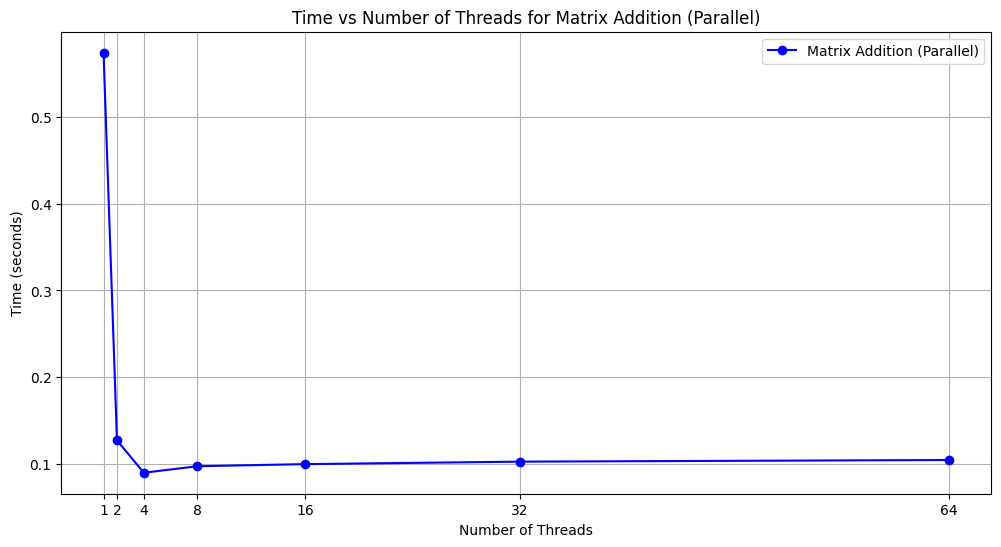

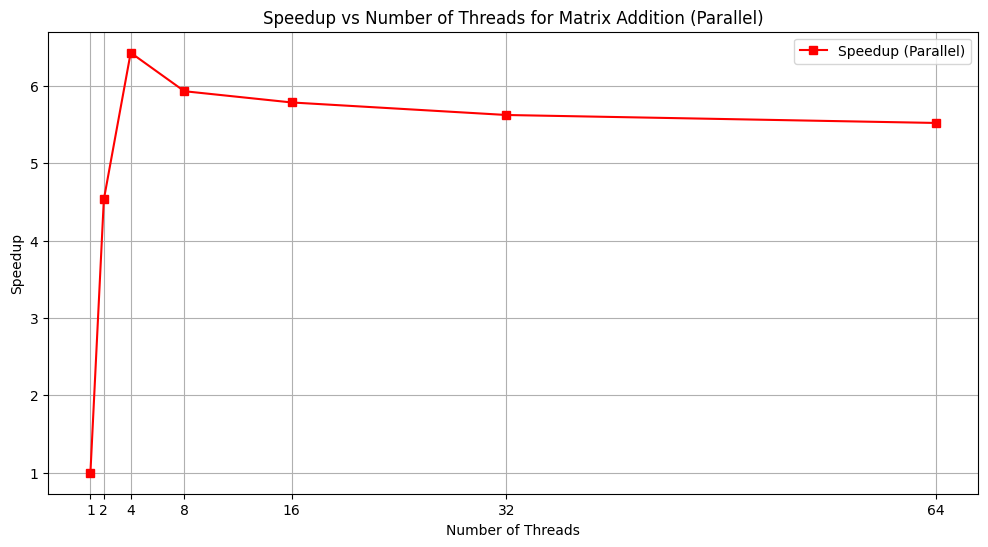

In [ ]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Times for matrix addition (in seconds) for parallel computation
time_matrix_add_parallel = [0.574580, 0.126784, 0.089373, 0.096871, 0.099305, 0.102164, 0.104069]

# Speedup calculation (Speedup = Time with 1 thread / Time with n threads)
speedup_matrix_add_parallel = [time_matrix_add_parallel[0] / t for t in time_matrix_add_parallel]

# Print the speedup values
print("Speedup for Matrix Addition (Parallel):")
for threads_count, speedup in zip(threads, speedup_matrix_add_parallel):
    print(f"Threads: {threads_count}, Speedup: {speedup:.4f}")

# Plotting the times for Matrix Addition (parallel computation)
plt.figure(figsize=(12, 6))

# Plot for matrix addition parallel times
plt.plot(threads, time_matrix_add_parallel, label='Matrix Addition (Parallel)', marker='o', linestyle='-', color='blue')

# Adding labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Threads for Matrix Addition (Parallel)')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(threads)
plt.show()

# Plotting speedup for Matrix Addition
plt.figure(figsize=(12, 6))

# Plot for speedup of matrix addition parallel computation
plt.plot(threads, speedup_matrix_add_parallel, label='Speedup (Parallel)', marker='s', linestyle='-', color='red')

# Adding labels and title for speedup plot
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads for Matrix Addition (Parallel)')
plt.legend()

# Display the speedup plot
plt.grid(True)
plt.xticks(threads)
plt.show()

In [6]:
import time

def calculate_parallel_fraction(S, N):
    """
    Calculate the fraction P that can be parallelized using Amdahl's Law.

    :param S: Speedup (S)
    :param N: Number of processors/threads (N)
    :return: Parallel fraction P or None if the values are invalid.
    """
    if S <= 1 or N <= 1:
        # Skip calculation for invalid values of S or N
        return None

    # Apply Amdahl's Law to calculate the parallel fraction
    try:
        P = ((S - 1) * N) / (S * (N - 1))
    except ZeroDivisionError:
        return None

    # If calculated fraction is outside the range [0, 1], return None
    if P < 0 or P > 1:
        return None

    return P

# Speedup values for matrix addition calculations
speedups_matrix_addition = {
    1: 1.000000,
    2: 4.531950,
    4: 6.429024,
    8: 5.931406,
    16: 5.786029,
    32: 5.624106,
    64: 5.521125
}

# Calculate parallel fraction P for matrix addition
parallel_fraction_matrix_addition = {
    threads: calculate_parallel_fraction(speedup, threads)
    for threads, speedup in speedups_matrix_addition.items() if calculate_parallel_fraction(speedup, threads) is not None
}

# Display results in the requested format
print("Performing Matrix Addition\n")

# For Matrix Addition (without critical section, as in your example)
for threads in speedups_matrix_addition.keys():
    speedup = speedups_matrix_addition[threads]
    P = parallel_fraction_matrix_addition.get(threads, None)

    time_taken = {
        1: 0.574580,
        2: 0.126784,
        4: 0.089373,
        8: 0.096871,
        16: 0.099305,
        32: 0.102164,
        64: 0.104069
    }

    if time_taken is not None and P is not None:
        print(f"Threads: {threads}, Parallel Fraction P: {P:.6f}")

Performing Matrix Addition

Threads: 8, Parallel Fraction P: 0.950178
Threads: 16, Parallel Fraction P: 0.882315
Threads: 32, Parallel Fraction P: 0.848716
Threads: 64, Parallel Fraction P: 0.831876


---

# Parallel Code for NxN Matrix Multiplication - Double Precision Floating Point Numbers

## Problem Statement

Write parallel code to perform the multiplication of two **NxN** matrices, where each element of the matrix is a double precision number. Consider **N** values sufficiently large, at least **10000**.

The problem consists of the following tasks:

1. **Serial Code**  
   Implement a serial code to perform matrix multiplication of two NxN matrices.

2. **Parallel Code**  
   Implement parallel code using OpenMP to perform the matrix multiplication.

3. **Report - Thread vs Time**  
   Run the parallel code with different numbers of threads: 1, 2, 4, 6, 8, 10, 12, 16, 20, 32, and 64 processors. Measure the time taken for each run and report the results.

4. **Plot Speedup vs Processors**  
   Plot the speedup of the parallel code against the number of processors (threads).

5. **Inference**  
   Estimate the parallelization fraction and provide an inference regarding the performance.


Speedup for Matrix Multiplication (Parallel):
Threads: 1, Speedup: 1.000000
Threads: 2, Speedup: 1.789672
Threads: 4, Speedup: 3.131595
Threads: 8, Speedup: 5.424784
Threads: 16, Speedup: 5.825867
Threads: 32, Speedup: 6.297749
Threads: 64, Speedup: 6.126837


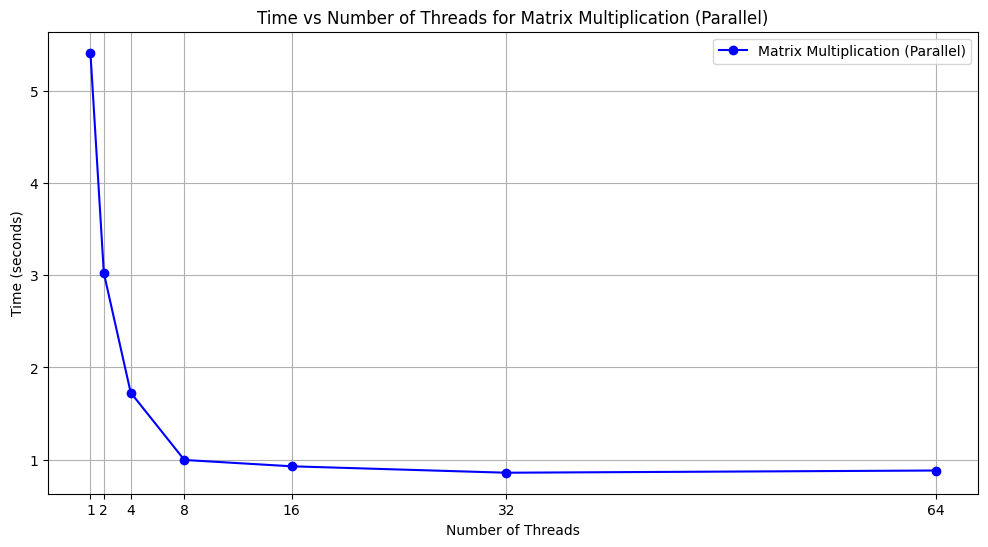

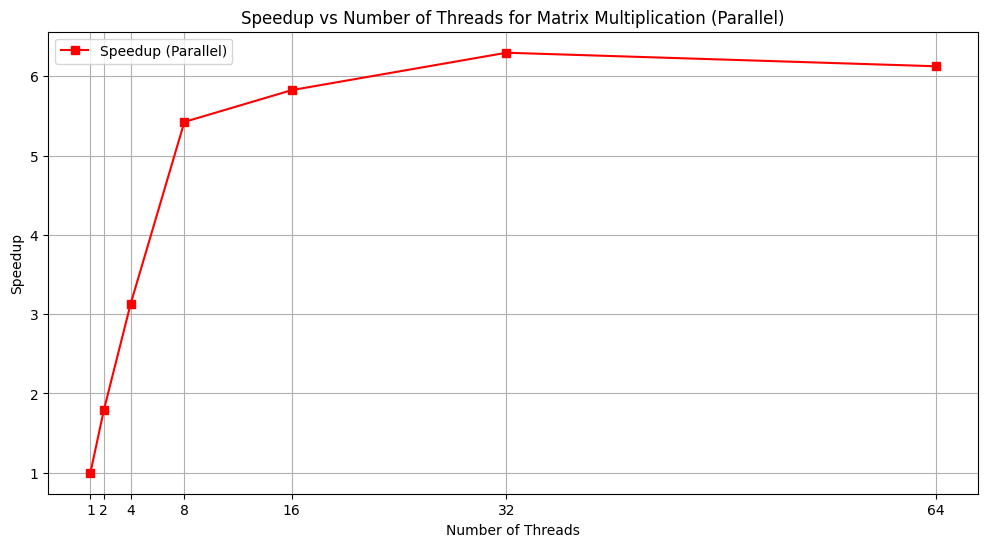

In [1]:
import matplotlib.pyplot as plt

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Times for matrix multiplication (in seconds) for parallel computation
time_matrix_mul_parallel = [5.412166, 3.024110, 1.728246, 0.997674, 0.928989, 0.859381, 0.883354]

# Speedup calculation (Speedup = Time with 1 thread / Time with n threads)
speedup_matrix_mul_parallel = [time_matrix_mul_parallel[0] / t for t in time_matrix_mul_parallel]

# Print the speedup values
print("Speedup for Matrix Multiplication (Parallel):")
for threads_count, speedup in zip(threads, speedup_matrix_mul_parallel):
    print(f"Threads: {threads_count}, Speedup: {speedup:.6f}")

# Plotting the times for Matrix Multiplication (parallel computation)
plt.figure(figsize=(12, 6))

# Plot for matrix multiplication parallel times
plt.plot(threads, time_matrix_mul_parallel, label='Matrix Multiplication (Parallel)', marker='o', linestyle='-', color='blue')

# Adding labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Threads for Matrix Multiplication (Parallel)')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(threads)
plt.show()

# Plotting speedup for Matrix Multiplication
plt.figure(figsize=(12, 6))

# Plot for speedup of matrix multiplication parallel computation
plt.plot(threads, speedup_matrix_mul_parallel, label='Speedup (Parallel)', marker='s', linestyle='-', color='red')

# Adding labels and title for speedup plot
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads for Matrix Multiplication (Parallel)')
plt.legend()

# Display the speedup plot
plt.grid(True)
plt.xticks(threads)
plt.show()

In [7]:
import time

def calculate_parallel_fraction(S, N):
    """
    Calculate the fraction P that can be parallelized using Amdahl's Law.

    :param S: Speedup (S)
    :param N: Number of processors/threads (N)
    :return: Parallel fraction P or None if the values are invalid.
    """
    if S <= 1 or N <= 1:
        # Skip calculation for invalid values of S or N
        return None

    # Apply Amdahl's Law to calculate the parallel fraction
    try:
        P = ((S - 1) * N) / (S * (N - 1))
    except ZeroDivisionError:
        return None

    # If calculated fraction is outside the range [0, 1], return None
    if P < 0 or P > 1:
        return None

    return P

# Speedup values for matrix multiplication calculations
speedups_matrix_multiplication = {
    1: 1.000000,
    2: 1.789672,
    4: 3.131595,
    8: 5.424784,
    16: 5.825866,
    32: 6.297751,
    64: 6.126839
}

# Calculate parallel fraction P for matrix multiplication
parallel_fraction_matrix_multiplication = {
    threads: calculate_parallel_fraction(speedup, threads)
    for threads, speedup in speedups_matrix_multiplication.items() if calculate_parallel_fraction(speedup, threads) is not None
}

# Display results in the requested format
print("Performing Matrix Multiplication\n")

# For Matrix Multiplication
for threads in speedups_matrix_multiplication.keys():
    speedup = speedups_matrix_multiplication[threads]
    P = parallel_fraction_matrix_multiplication.get(threads, None)

    time_taken = {
        1: 5.412166,
        2: 3.024110,
        4: 1.728246,
        8: 0.997674,
        16: 0.928989,
        32: 0.859381,
        64: 0.883354
    }

    if time_taken is not None and P is not None:
        print(f"Threads: {threads}, Parallel Fraction P: {P:.6f}")

Performing Matrix Multiplication

Threads: 2, Parallel Fraction P: 0.882477
Threads: 4, Parallel Fraction P: 0.907565
Threads: 8, Parallel Fraction P: 0.932184
Threads: 16, Parallel Fraction P: 0.883575
Threads: 32, Parallel Fraction P: 0.868349
Threads: 64, Parallel Fraction P: 0.850066
